# Imports

In [116]:
!pip3 install hazm
!apt-get install antiword
!pip3 install textract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
antiword is already the newest version (0.37-11build1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [87]:
import textract
import hazm
import re
import pandas as pd
import numpy as np
import tensorflow as tf

from keras.layers import Concatenate 
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.preprocessing import text
from keras import layers
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

# Preprocessing

In [154]:
full_text = textract.process("/content/daftar2.doc")
full_text = full_text.decode("utf-8") 
full_text = re.sub(r'\u200f', ' ', full_text)
full_text = re.sub(r'\n', '.', full_text)
full_text = re.sub(r'\s+', ' ', full_text)

full_text

'. مدتى اين مثنوى تاخير شد مهلتى بايست تا خون شير شد. تا نزايد بخت تو فرزند نو خون، نگردد شير شيرين خوش شنو. چون ضياء الحق حسام الدين عنان باز گردانيد ز اوج آسمان . چون به معراج حقايق رفته بود بى بهارش غنچه ها نشكفته بود. چون ز دريا سوى ساحل باز گشت چنگ شعر مثنوى با ساز گشت . مثنوى كه صيقل ارواح بود باز گشتش روز استفتاح بود. مطلع تاريخ اين سودا و سود سال اندر ششصد و شصت و دو بود. بلبلى ز ينجا برفت و باز گشت بهر صيد اين معانى باز گشت . ساعد شه مسكن اين باز باد تا ابد بر خلق اين در باز باد. آفت اين در هوا و شهوت است ور نه اينجا شربت اندر شربت است . اين دهان بر بند تا بينى عيان چشم بند آن جهان حلق و دهان . اى دهان تو خود دهانه ى دوزخى وى جهان تو بر مثال برزخى . نور باقى پهلوى دنياى دون شير صافى پهلوى جوهاى خون . چون در او گامى زنى بى احتياط شير تو خون مى شود از اختلاط. يك قدم زد آدم اندر ذوق نفس شد فراق صدر جنت طوق نفس . همچو ديو از وى فرشته مى گريخت بهر نانى چند آب چشم ريخت . گر چه يك مو بد گنه كاو جسته بود ليك آن مو در دو ديده رسته بود. بود آدم ديده ى نور قديم موى در ديده بود كوه عظيم .

In [4]:
full_text_list = full_text.split('.')
for index, item in enumerate(full_text_list):
  if item == '':
    full_text_list.remove('')
  else:
    full_text_list[index] = full_text_list[index].lstrip().rstrip()
full_text_list

[' مدتى اين مثنوى تاخير شد مهلتى بايست تا خون شير شد',
 'تا نزايد بخت تو فرزند نو خون، نگردد شير شيرين خوش شنو',
 'چون ضياء الحق حسام الدين عنان باز گردانيد ز اوج آسمان',
 'چون به معراج حقايق رفته بود بى بهارش غنچه ها نشكفته بود',
 'چون ز دريا سوى ساحل باز گشت چنگ شعر مثنوى با ساز گشت',
 'مثنوى كه صيقل ارواح بود باز گشتش روز استفتاح بود',
 'مطلع تاريخ اين سودا و سود سال اندر ششصد و شصت و دو بود',
 'بلبلى ز ينجا برفت و باز گشت بهر صيد اين معانى باز گشت',
 'ساعد شه مسكن اين باز باد تا ابد بر خلق اين در باز باد',
 'آفت اين در هوا و شهوت است ور نه اينجا شربت اندر شربت است',
 'اين دهان بر بند تا بينى عيان چشم بند آن جهان حلق و دهان',
 'اى دهان تو خود دهانه ى دوزخى وى جهان تو بر مثال برزخى',
 'نور باقى پهلوى دنياى دون شير صافى پهلوى جوهاى خون',
 'چون در او گامى زنى بى احتياط شير تو خون مى شود از اختلاط',
 'يك قدم زد آدم اندر ذوق نفس شد فراق صدر جنت طوق نفس',
 'همچو ديو از وى فرشته مى گريخت بهر نانى چند آب چشم ريخت',
 'گر چه يك مو بد گنه كاو جسته بود ليك آن مو در دو ديده رسته بود',
 'بود آدم 

In [8]:
word_tokenized =  [ hazm.word_tokenize(text) for text in full_text_list  ] 

In [7]:
# Persian stop words source: https://github.com/kharazi/persian-stopwords
# stop word
stop_words_df = pd.read_csv("/content/stopwords.txt", sep="\n", header=None, names=["words"])
stop_words_list = stop_words_df["words"].values.tolist()

sentences_list = []
corpes = []
for sentence in word_tokenized:
  words_list = []
  cps = ""
  for word in sentence:
    if word not in stop_words_list:
      words_list.append(word)
      cps += word + " "
  sentences_list.append(words_list)
  corpes.append(cps.lstrip().rstrip())
sentences_list

[['مدتى', 'مثنوى', 'تاخير', 'مهلتى', 'بايست', 'خون', 'شير'],
 ['نزايد', 'بخت', 'فرزند', 'نو', 'خون', 'نگردد', 'شير', 'شيرين', 'شنو'],
 ['ضياء', 'الحق', 'حسام', 'الدين', 'عنان', 'گردانيد', 'اوج', 'آسمان'],
 ['معراج', 'حقايق', 'رفته_بود', 'بهارش', 'غنچه', 'نشكفته'],
 ['دريا', 'سوى', 'ساحل', 'چنگ', 'شعر', 'مثنوى', 'ساز'],
 ['مثنوى', 'صيقل', 'ارواح', 'گشتش', 'استفتاح'],
 ['مطلع', 'تاريخ', 'سودا', 'سود', 'سال', 'اندر', 'ششصد', 'شصت'],
 ['بلبلى', 'ينجا', 'برفت', 'صيد', 'معانى'],
 ['ساعد', 'شه', 'مسكن', 'ابد', 'خلق'],
 ['آفت', 'هوا', 'شهوت', 'اينجا', 'شربت', 'اندر', 'شربت'],
 ['دهان', 'بند', 'بينى', 'عيان', 'چشم', 'بند', 'جهان', 'حلق', 'دهان'],
 ['دهان', 'دهانه', 'دوزخى', 'جهان', 'برزخى'],
 ['نور',
  'باقى',
  'پهلوى',
  'دنياى',
  'دون',
  'شير',
  'صافى',
  'پهلوى',
  'جوهاى',
  'خون'],
 ['گامى', 'زنى', 'احتياط', 'شير', 'خون', 'اختلاط'],
 ['قدم',
  'زد',
  'آدم',
  'اندر',
  'ذوق',
  'نفس',
  'فراق',
  'صدر',
  'جنت',
  'طوق',
  'نفس'],
 ['ديو', 'فرشته', 'گريخت', 'نانى', 'آب', 'چشم', 'ريخت'

In [9]:
tokenizer  = text.Tokenizer()
tokenizer.fit_on_texts(corpes)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 50

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corpes]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 7080
Vocabulary Sample: [('اندر', 1), ('جان', 2), ('دل', 3), ('چشم', 4), ('آب', 5), ('كن', 6), ('سوى', 7), ('نور', 8), ('كاو', 9), ('يكى', 10)]


In [103]:
from keras.preprocessing.sequence import skipgrams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=2) for wid in wids]
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(مهلتى (3295), بايست (1216)) -> 1
(تاخير (2134), غلط (1969)) -> 0
(مدتى (1581), تاخير (2134)) -> 1
(خون (50), شير (42)) -> 1
(مهلتى (3295), شنعت (6747)) -> 0
(مهلتى (3295), انبار (6542)) -> 0
(بايست (1216), خون (50)) -> 1
(مهلتى (3295), عزم (1205)) -> 0
(خون (50), مهلتى (3295)) -> 1
(بايست (1216), شير (42)) -> 1


In [83]:
couples, labels = skip_grams[0]
word_target, word_context = zip(*couples)
word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")
print(couples[:10], labels[:10])
word_target


[[42, 1216], [2134, 7047], [1216, 2134], [42, 5458], [1581, 3761], [42, 50], [50, 42], [2134, 1216], [1581, 2134], [1582, 2134]] [1, 0, 1, 0, 0, 1, 1, 1, 1, 1]


array([  42, 2134, 1216,   42, 1581,   42,   50, 2134, 1581, 1582, 3295,
       2134, 3295,   50, 3295, 1582, 1216, 1216, 3295, 1582, 1216,   50,
       1582, 1581, 1216, 2134, 3295,   42, 3295, 2134, 1216, 1582, 2134,
       1582,   50,   50,   50, 1216, 2134, 3295, 1581, 2134, 1216, 3295],
      dtype=int32)

In [155]:
import tqdm
# Generates skip-gram pairs with negative sampling for a list of sequences
# (int-encoded sentences) based on window size, number of negative samples
# and vocabulary size.
def generate_training_data(sequences, window_size, num_ns, vocab_size, seed):
  # Elements of each training example are appended to these lists.
  targets, contexts, labels = [], [], []

  # Build the sampling table for `vocab_size` tokens.
  sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size)

  # Iterate over all sequences (sentences) in the dataset.
  for sequence in tqdm.tqdm(sequences):

    # Generate positive skip-gram pairs for a sequence (sentence).
    positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
          sequence,
          vocabulary_size=vocab_size,
          sampling_table=sampling_table,
          window_size=window_size,
          negative_samples=0)

    # Iterate over each positive skip-gram pair to produce training examples
    # with a positive context word and negative samples.
    for target_word, context_word in positive_skip_grams:
      context_class = tf.expand_dims(
          tf.constant([context_word], dtype="int64"), 1)
      negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
          true_classes=context_class,
          num_true=1,
          num_sampled=num_ns,
          unique=True,
          range_max=vocab_size,
          seed=SEED,
          name="negative_sampling")

      # Build context and label vectors (for one target word)
      negative_sampling_candidates = tf.expand_dims(
          negative_sampling_candidates, 1)

      context = tf.concat([context_class, negative_sampling_candidates], 0)
      label = tf.constant([1] + [0]*num_ns, dtype="int64")

      # Append each element from the training example to global lists.
      targets.append(target_word)
      contexts.append(context)
      labels.append(label)

  return targets, contexts, labels

In [159]:
num_ns = 4
window_size = 2
targets, contexts, labels = generate_training_data(
    sequences=wids,
    window_size=window_size,
    num_ns=num_ns,
    vocab_size=vocab_size,
    seed=SEED)
targets = np.array(targets)
contexts = np.array(contexts)[:,:,0]
labels = np.array(labels)

print('\n')
print(f"targets.shape: {targets.shape}")
print(f"contexts.shape: {contexts.shape}")
print(f"labels.shape: {labels.shape}")


100%|██████████| 3928/3928 [00:06<00:00, 630.85it/s]




targets.shape: (21385,)
contexts.shape: (21385, 5)
labels.shape: (21385, 5)


# Model

In [161]:
class Word2Vec(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim):
    super(Word2Vec, self).__init__()
    self.target_embedding = layers.Embedding(vocab_size,
                                      embedding_dim,
                                      input_length=1,
                                      name="w2v_embedding")
    self.context_embedding = layers.Embedding(vocab_size,
                                       embedding_dim,
                                       input_length=num_ns+1)

  def call(self, pair):
    target, context = pair
    # target: (batch, dummy?)  # The dummy axis doesn't exist in TF2.7+
    # context: (batch, context)
    if len(target.shape) == 2:
      target = tf.squeeze(target, axis=1)
    # target: (batch,)
    word_emb = self.target_embedding(target)
    # word_emb: (batch, embed)
    context_emb = self.context_embedding(context)
    # context_emb: (batch, context, embed)
    dots = tf.einsum('be,bce->bc', word_emb, context_emb)
    # dots: (batch, context)
    return dots

In [160]:
BATCH_SIZE = 1024
BUFFER_SIZE = 10000
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(dataset)
dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)
print(dataset)

<BatchDataset element_spec=((TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512, 5), dtype=tf.int64, name=None)), TensorSpec(shape=(512, 5), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=((TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512, 5), dtype=tf.int64, name=None)), TensorSpec(shape=(512, 5), dtype=tf.int64, name=None))>


In [162]:
def custom_loss(x_logit, y_true):
      return tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=y_true)

In [164]:
embedding_dim = 128
word2vec = Word2Vec(vocab_size, embedding_dim)
word2vec.compile(optimizer='adam',
                 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

In [166]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")


In [167]:
history = word2vec.fit(dataset, epochs=20, callbacks=[tensorboard_callback])


Epoch 1/20
41/41 [==============================] - 2s 25ms/step - loss: 1.6091 - accuracy: 0.2116
Epoch 2/20
41/41 [==============================] - 1s 24ms/step - loss: 1.5888 - accuracy: 0.8234
Epoch 3/20
41/41 [==============================] - 1s 25ms/step - loss: 1.5630 - accuracy: 0.9620
Epoch 4/20
41/41 [==============================] - 1s 24ms/step - loss: 1.5205 - accuracy: 0.9813
Epoch 5/20
41/41 [==============================] - 1s 24ms/step - loss: 1.4517 - accuracy: 0.9832
Epoch 6/20
41/41 [==============================] - 1s 25ms/step - loss: 1.3524 - accuracy: 0.9810
Epoch 7/20
41/41 [==============================] - 1s 24ms/step - loss: 1.2280 - accuracy: 0.9797
Epoch 8/20
41/41 [==============================] - 1s 24ms/step - loss: 1.0901 - accuracy: 0.9794
Epoch 9/20
41/41 [==============================] - 1s 24ms/step - loss: 0.9491 - accuracy: 0.9815
Epoch 10/20
41/41 [==============================] - 1s 24ms/step - loss: 0.8127 - accuracy: 0.9849
Epoch 11/

In [168]:
word2vec.summary()

Model: "word2_vec_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 w2v_embedding (Embedding)   multiple                  906240    
                                                                 
 embedding_16 (Embedding)    multiple                  906240    
                                                                 
Total params: 1,812,480
Trainable params: 1,812,480
Non-trainable params: 0
_________________________________________________________________


In [37]:

# word_model = Sequential()
# word_model.add(Embedding(vocab_size, embed_size,
#                          embeddings_initializer="glorot_uniform",
#                          input_length=1))
# word_model.add(Reshape((embed_size, )))

# context_model = Sequential()
# context_model.add(Embedding(vocab_size, embed_size,
#                   embeddings_initializer="glorot_uniform",
#                   input_length=1))
# context_model.add(Reshape((embed_size,)))

# model = Sequential()
# model.add(Concatenate([word_model, context_model]))
# model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
# model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])


# Result

In [169]:
weights = word2vec.get_layer('w2v_embedding').get_weights()[0]
weights.shape

(7080, 128)

In [170]:
from sklearn.metrics.pairwise import cosine_distances

def get_most_similarity(word, weights=weights, tokenizer=tokenizer, n=15):
  distance_matrix = cosine_distances(weights)
  word_to_sequences = tokenizer.texts_to_sequences([word])[0][0]
  index = np.argsort(distance_matrix[word_to_sequences])[:n]
  sequences_to_word = tokenizer.sequences_to_texts([index])[0]
  most_similarity = sequences_to_word.split(' ')
  return most_similarity

In [171]:
get_most_similarity('ساحل')

['ساحل',
 'شرمسارى',
 'بميزد',
 'خرد',
 'جانى',
 'مطوى',
 'اويم',
 'ديوانگانه',
 'شر',
 'نامم',
 'أنظرني',
 'صدق',
 'بروى',
 'برم',
 'اتقوا']

In [172]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['جان', 'دل', 'انگور', 'قبله', 'خون', 'ساحل', 'آسمان','آفتاب']}

similar_words

(7080, 7080)


{'آسمان': ['نداند', 'نهال', 'كاشكارا', 'زنده', 'تابشى'],
 'آفتاب': ['بساخت', 'حجاب', 'روده', 'كيس', 'سكوت'],
 'انگور': ['گرگى', 'درهاى', 'نقدش', 'دنيانا', 'زيرك'],
 'جان': ['سبز', 'خلعتى', 'هستها', 'طبيبان', 'پرداختش'],
 'خون': ['گمرهان', 'وفاى', 'كمند', 'نامرد', 'كژروى'],
 'دل': ['گوشش', 'بخست', 'جهات', 'طعام', 'گروگان'],
 'ساحل': ['جاهلان', 'خودى', 'تنزيه', 'كراماتى', 'برخاست'],
 'قبله': ['كعبه', 'صوفيان', 'ستار', 'طبيبى', 'خورش']}

Total words: 48 	Word Embedding shapes: (48, 128)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


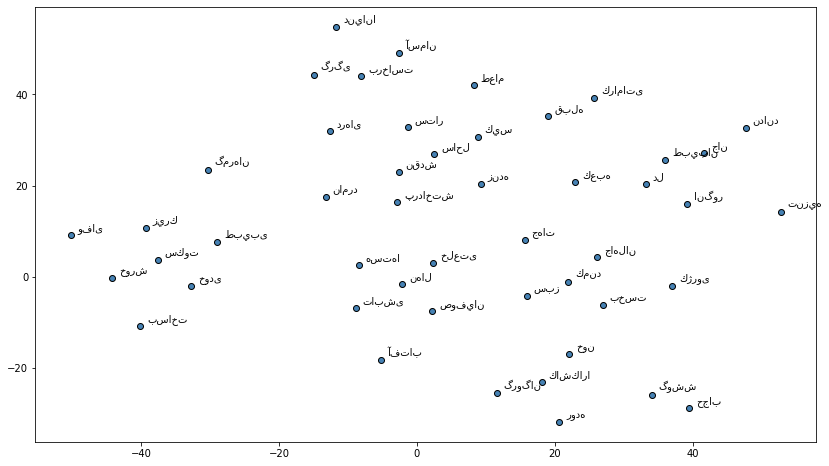

In [173]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

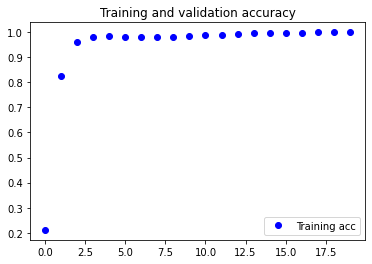

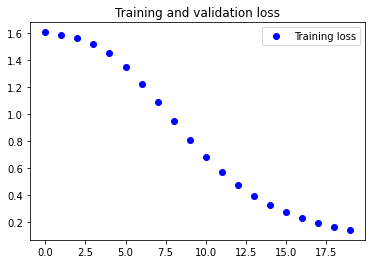

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()